In [29]:
import pandas as pd

In [30]:
df = pd.read_csv('Cleaned Data 1.csv')
new_df = df.drop(df.columns[[0,1,2,3,4,5,6,7,8,11,12,13,14,15,19]], axis=1)
col = new_df.pop('New_User_Score')
new_df['New_User_Score'] = col
new_df

,Global_Sales,Critic_Score,years_since_release,Developer_clas,New_User_Score
0,82.53,76.0,10.0,1,1
1,35.52,82.0,8.0,1,1
2,32.77,80.0,7.0,1,1
3,29.80,89.0,10.0,1,1
4,28.92,58.0,10.0,1,0
...,...,...,...,...,...
6885,0.01,81.0,14.0,0,1
6886,0.01,80.0,2.0,0,0
6887,0.01,61.0,5.0,0,0
6888,0.01,60.0,5.0,0,0


In [31]:
dataset = new_df.values

In [32]:
dataset

array([[8.253e+01, 7.600e+01, 1.000e+01, 1.000e+00, 1.000e+00],
       [3.552e+01, 8.200e+01, 8.000e+00, 1.000e+00, 1.000e+00],
       [3.277e+01, 8.000e+01, 7.000e+00, 1.000e+00, 1.000e+00],
       ...,
       [1.000e-02, 6.100e+01, 5.000e+00, 0.000e+00, 0.000e+00],
       [1.000e-02, 6.000e+01, 5.000e+00, 0.000e+00, 0.000e+00],
       [1.000e-02, 6.300e+01, 7.000e+00, 0.000e+00, 0.000e+00]])

In [33]:
X = dataset[:,0:4]
Y = dataset[:,4]

In [34]:
from sklearn import preprocessing

In [35]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [36]:
X_scale

array([[1.        , 0.74117647, 0.32258065, 1.        ],
       [0.43031992, 0.81176471, 0.25806452, 1.        ],
       [0.39699467, 0.78823529, 0.22580645, 1.        ],
       ...,
       [0.        , 0.56470588, 0.16129032, 0.        ],
       [0.        , 0.55294118, 0.16129032, 0.        ],
       [0.        , 0.58823529, 0.22580645, 0.        ]])

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [38]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(5512, 4) (689, 4) (689, 4) (5512,) (689,) (689,)


In [39]:
from keras.models import Sequential
from keras.layers import Dense

In [43]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(4,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [44]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [45]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
173/173 [==============================] - 1s 3ms/step - loss: 0.6784 - accuracy: 0.5902 - val_loss: 0.6603 - val_accuracy: 0.6444
Epoch 2/100
173/173 [==============================] - 0s 1ms/step - loss: 0.6531 - accuracy: 0.6500 - val_loss: 0.6511 - val_accuracy: 0.6444
Epoch 3/100
173/173 [==============================] - 0s 1ms/step - loss: 0.6469 - accuracy: 0.6500 - val_loss: 0.6480 - val_accuracy: 0.6444
Epoch 4/100
173/173 [==============================] - 0s 1ms/step - loss: 0.6441 - accuracy: 0.6500 - val_loss: 0.6460 - val_accuracy: 0.6444
Epoch 5/100
173/173 [==============================] - 0s 2ms/step - loss: 0.6420 - accuracy: 0.6500 - val_loss: 0.6441 - val_accuracy: 0.6444
Epoch 6/100
173/173 [==============================] - 0s 2ms/step - loss: 0.6398 - accuracy: 0.6500 - val_loss: 0.6420 - val_accuracy: 0.6444
Epoch 7/100
173/173 [==============================] - 0s 1ms/step - loss: 0.6374 - accuracy: 0.6500 - val_loss: 0.6396 - val_accuracy: 0.6444

Epoch 58/100
173/173 [==============================] - 0s 2ms/step - loss: 0.5116 - accuracy: 0.7462 - val_loss: 0.5188 - val_accuracy: 0.7373
Epoch 59/100
173/173 [==============================] - 0s 1ms/step - loss: 0.5118 - accuracy: 0.7437 - val_loss: 0.5175 - val_accuracy: 0.7329
Epoch 60/100
173/173 [==============================] - 0s 2ms/step - loss: 0.5118 - accuracy: 0.7444 - val_loss: 0.5182 - val_accuracy: 0.7329
Epoch 61/100
173/173 [==============================] - 0s 2ms/step - loss: 0.5115 - accuracy: 0.7437 - val_loss: 0.5178 - val_accuracy: 0.7373
Epoch 62/100
173/173 [==============================] - 0s 2ms/step - loss: 0.5116 - accuracy: 0.7455 - val_loss: 0.5178 - val_accuracy: 0.7358
Epoch 63/100
173/173 [==============================] - 0s 1ms/step - loss: 0.5113 - accuracy: 0.7455 - val_loss: 0.5182 - val_accuracy: 0.7358
Epoch 64/100
173/173 [==============================] - 0s 1ms/step - loss: 0.5115 - accuracy: 0.7458 - val_loss: 0.5177 - val_accuracy:

In [46]:
model.evaluate(X_test, Y_test)[1]

22/22 [==============================] - 0s 1ms/step - loss: 0.4970 - accuracy: 0.7678


0.7677794098854065

In [47]:
import matplotlib.pyplot as plt

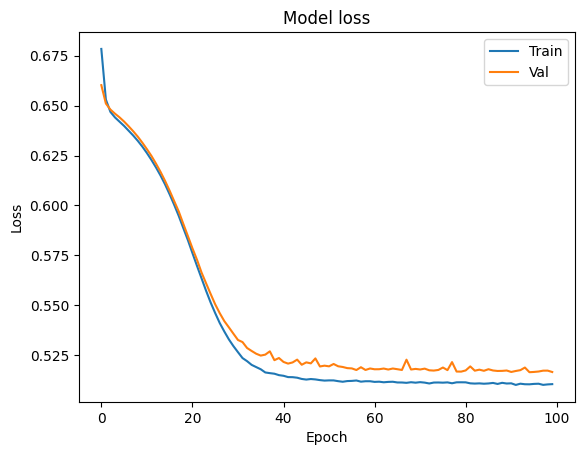

In [48]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

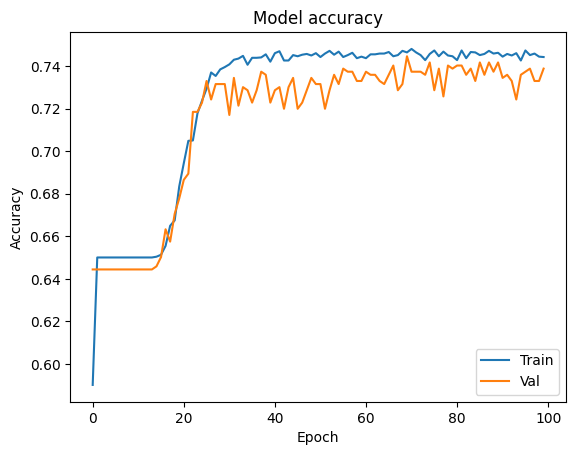

In [51]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# Adding Regularization

In [53]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(4,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
173/173 [==============================] - 5s 25ms/step - loss: 0.5649 - accuracy: 0.7117 - val_loss: 0.5308 - val_accuracy: 0.7417
Epoch 2/100
173/173 [==============================] - 4s 25ms/step - loss: 0.5213 - accuracy: 0.7360 - val_loss: 0.5214 - val_accuracy: 0.7373
Epoch 3/100
173/173 [==============================] - 4s 25ms/step - loss: 0.5174 - accuracy: 0.7369 - val_loss: 0.5572 - val_accuracy: 0.7141
Epoch 4/100
173/173 [==============================] - 4s 25ms/step - loss: 0.5205 - accuracy: 0.7348 - val_loss: 0.5200 - val_accuracy: 0.7373
Epoch 5/100
173/173 [==============================] - 4s 25ms/step - loss: 0.5170 - accuracy: 0.7277 - val_loss: 0.5464 - val_accuracy: 0.7373
Epoch 6/100
173/173 [==============================] - 4s 25ms/step - loss: 0.5166 - accuracy: 0.7366 - val_loss: 0.5451 - val_accuracy: 0.7489
Epoch 7/100
173/173 [==============================] - 4s 25ms/step - loss: 0.5142 - accuracy: 0.7415 - val_loss: 0.5503 - val_accuracy:

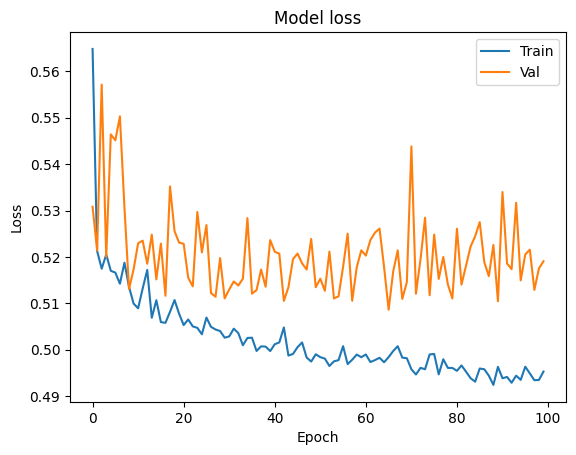

In [54]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

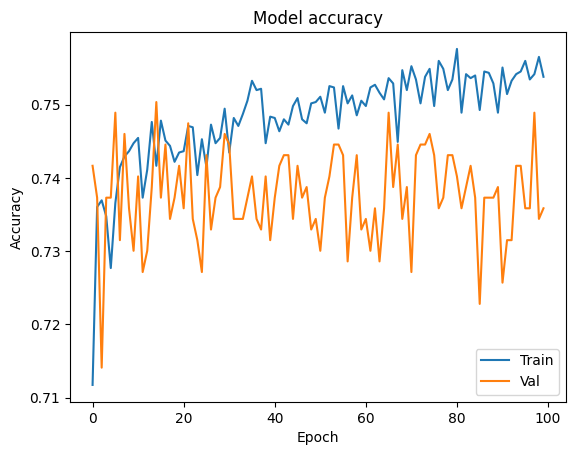

In [55]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()